# Bank Marketing Model

## Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
* bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). 
* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). 
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

## Attribute Information:

Input variables:

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
16. emp.var.rate: employment variation rate quarterly indicator (numeric)
17. cons.price.idx: consumer price index monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate daily indicator (numeric)
20. nr.employed: number of employees quarterly indicator (numeric)

Output variable (desired target):

21. y has the client subscribed a term deposit? (binary: 'yes','no')

# EDA

In [112]:
from platform import python_version
assert(python_version() == "3.8.5")

## Global Packages

In [113]:
import os
import matplotlib.pyplot as plt
import urllib
import pandas as pd
import numpy as np
from zipfile import ZipFile

In [114]:
import category_encoders as ce
from pycaret.classification import *

### GLOBAL VARS

In [115]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
current_file = os.path.dirname(os.getcwd())
TEST = False
random = 123

In [116]:
save_path = current_file + "/data/bankmarketing.zip"
link = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

def download_files(save_path, link):
    if not os.path.exists(save_path):
        urllib.request.urlretrieve(link, save_path)
    
download_files(save_path, link)
zip_file = ZipFile(save_path)
df = pd.read_csv(zip_file.open('bank-additional/bank-additional-full.csv'), sep = ";")
df.head(100)

age          job   marital            education  default housing loan  \
0    56    housemaid   married             basic.4y       no      no   no   
1    57     services   married          high.school  unknown      no   no   
2    37     services   married          high.school       no     yes   no   
3    40       admin.   married             basic.6y       no      no   no   
4    56     services   married          high.school       no      no  yes   
..  ...          ...       ...                  ...      ...     ...  ...   
95   45     services   married  professional.course       no     yes   no   
96   42   management   married    university.degree       no      no   no   
97   53       admin.  divorced    university.degree  unknown      no   no   
98   37   technician    single  professional.course       no      no   no   
99   44  blue-collar   married             basic.6y       no      no   no   

      contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   telephone   may         mon  ...         1    999         0  nonexistent   
1   telephone   may         mon  ...         1    999         0  nonexistent   
2   telephone   may         mon  ...         1    999         0  nonexistent   
3   telephone   may         mon  ...         1    999         0  nonexistent   
4   telephone   may         mon  ...         1    999         0  nonexistent   
..        ...   ...         ...  ...       ...    ...       ...          ...   
95  telephone   may         mon  ...         1    999         0  nonexistent   
96  telephone   may         mon  ...         1    999         0  nonexistent   
97  telephone   may         mon  ...         1    999         0  nonexistent   
98  telephone   may         mon  ...         1    999         0  nonexistent   
99  telephone   may         mon  ...         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no  
..          ...             ...            ...        ...          ...  ..  
95          1.1          93.994          -36.4      4.857       5191.0  no  
96          1.1          93.994          -36.4      4.857       5191.0  no  
97          1.1          93.994          -36.4      4.857       5191.0  no  
98          1.1          93.994          -36.4      4.857       5191.0  no  
99          1.1          93.994          -36.4      4.857       5191.0  no  

[100 rows x 21 columns]

In [117]:
df["y"] = df["y"].replace({"yes":1,"no":0})
df["st21"] = (df["age"] < 21)*1
df["st60"] = (df["age"] > 60)*1

In [118]:
X = df.drop(["y","duration"], axis = 1)
y = df[["y"]]
X.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...    999         0  nonexistent          1.1   
1   may         mon  ...    999         0  nonexistent          1.1   
2   may         mon  ...    999         0  nonexistent          1.1   
3   may         mon  ...    999         0  nonexistent          1.1   
4   may         mon  ...    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  st21  st60  
0          93.994          -36.4      4.857       5191.0     0     0  
1          93.994          -36.4      4.857       5191.0     0     0  
2          93.994          -36.4      4.857       5191.0     0     0  
3          93.994          -36.4      4.857       5191.0     0     0  
4          93.994          -36.4      4.857       5191.0     0     0  

[5 rows x 21 columns]

In [119]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
encoder_te = ce.JamesSteinEncoder(cols=cols)
encoder_oh = ce.OneHotEncoder(cols=cols)

In [120]:
X_te = encoder_te.fit_transform(X,y)
X_oh = encoder_oh.fit_transform(X[cols],y).add_suffix('_oh')

X_tr = pd.concat([X_te, X_oh], axis=1)
X_tr["month"].unique()
X_tr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'st21', 'st60', 'job_1_oh', 'job_2_oh',
       'job_3_oh', 'job_4_oh', 'job_5_oh', 'job_6_oh', 'job_7_oh', 'job_8_oh',
       'job_9_oh', 'job_10_oh', 'job_11_oh', 'job_12_oh', 'marital_1_oh',
       'marital_2_oh', 'marital_3_oh', 'marital_4_oh', 'education_1_oh',
       'education_2_oh', 'education_3_oh', 'education_4_oh', 'education_5_oh',
       'education_6_oh', 'education_7_oh', 'education_8_oh', 'default_1_oh',
       'default_2_oh', 'default_3_oh', 'housing_1_oh', 'housing_2_oh',
       'housing_3_oh', 'loan_1_oh', 'loan_2_oh', 'loan_3_oh', 'contact_1_oh',
       'contact_2_oh', 'month_1_oh', 'month_2_oh', 'month_3_oh', 'month_4_oh',
       'month_5_oh', 'month_6_oh', 'month_7_oh', 'month_8_oh', 'month_9_oh',
       'month_10_o

In [121]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.05, random_state= random, stratify = y)

df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [122]:
clf = setup(data = df_train, target = 'y', session_id = random, fix_imbalance = True, feature_selection=False, numeric_features=df_train.columns[:-1].tolist())

Setup Succesfully Completed!


In [123]:
best_model = compare_models(n_select=5, sort="AUC", fold=5)

In [124]:
lgbm = create_model("lightgbm")

In [125]:
tuned_lgbm = tune_model(lgbm, choose_better=True, fold=5, n_iter=1000)

In [126]:
tuned_lgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [127]:
#blender = blend_models(fold = 5)

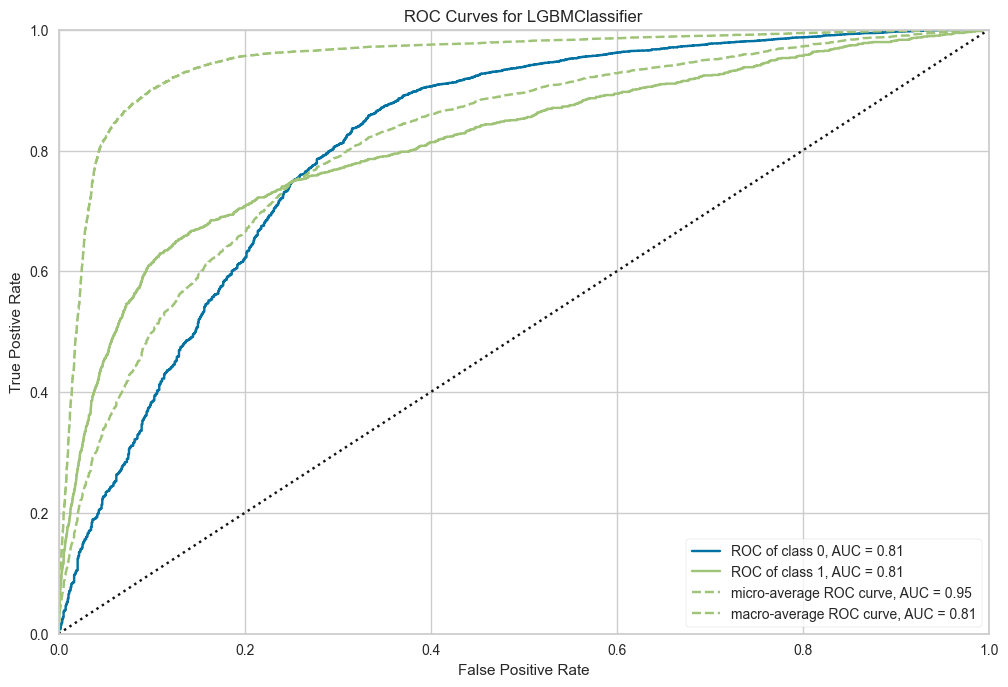

In [128]:
plot_model(tuned_lgbm)

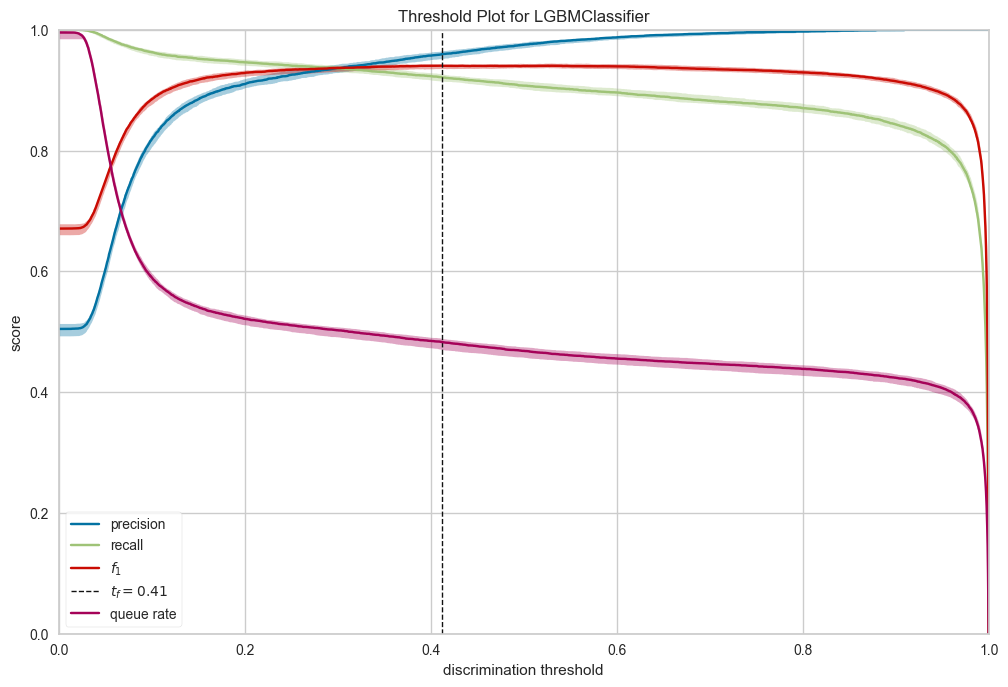

In [129]:
plot_model(tuned_lgbm, "threshold")

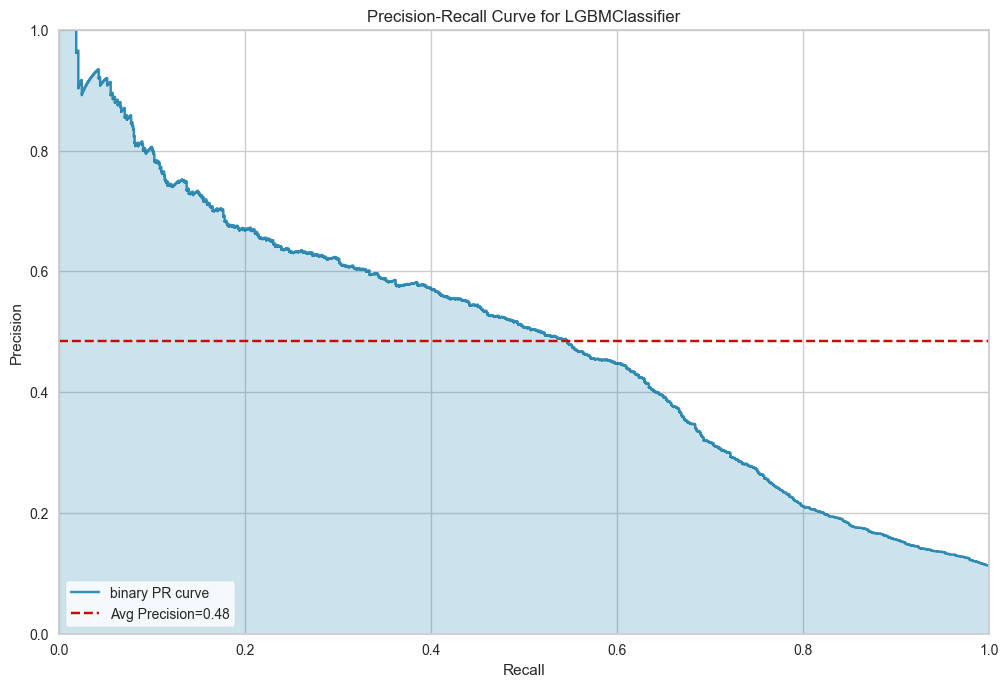

In [130]:
pr = plot_model(tuned_lgbm, plot='pr')

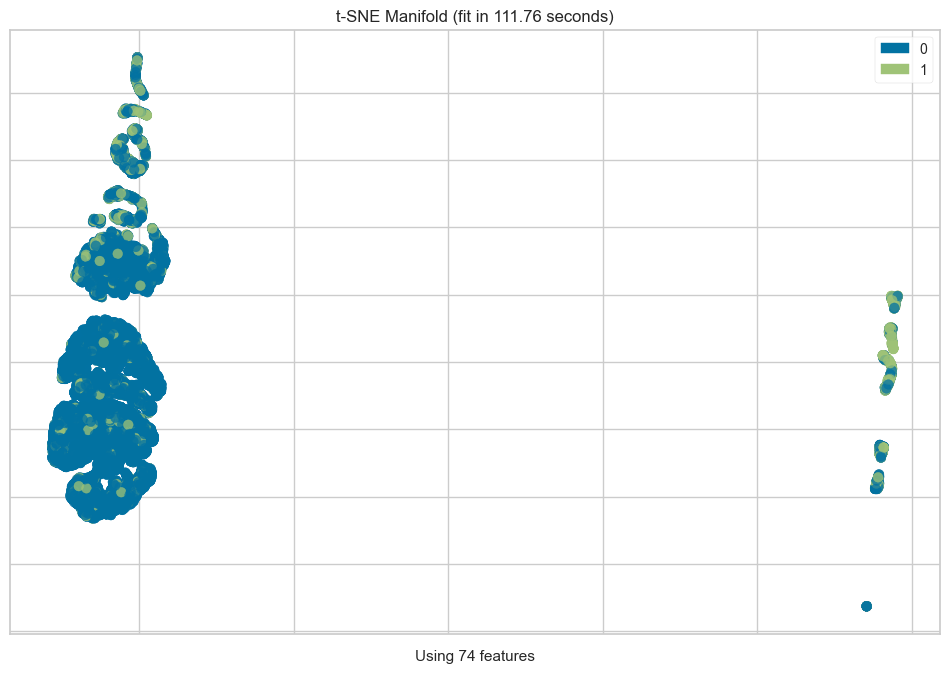

In [131]:
plot_model(tuned_lgbm, plot='manifold')

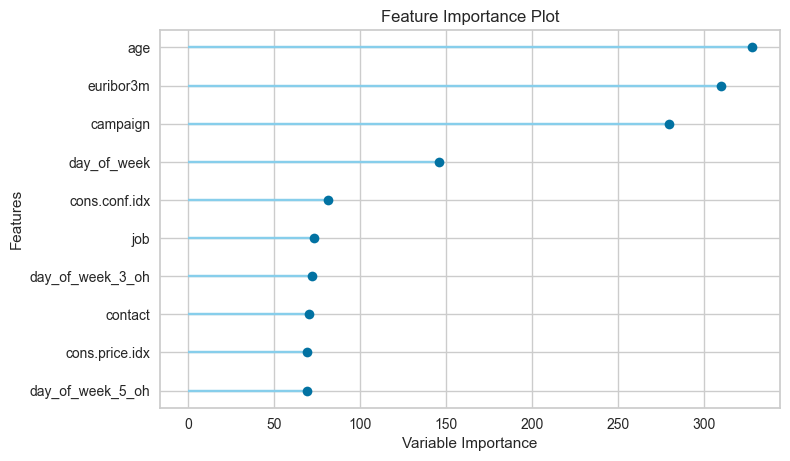

In [132]:
plot_model(tuned_lgbm, plot='feature')

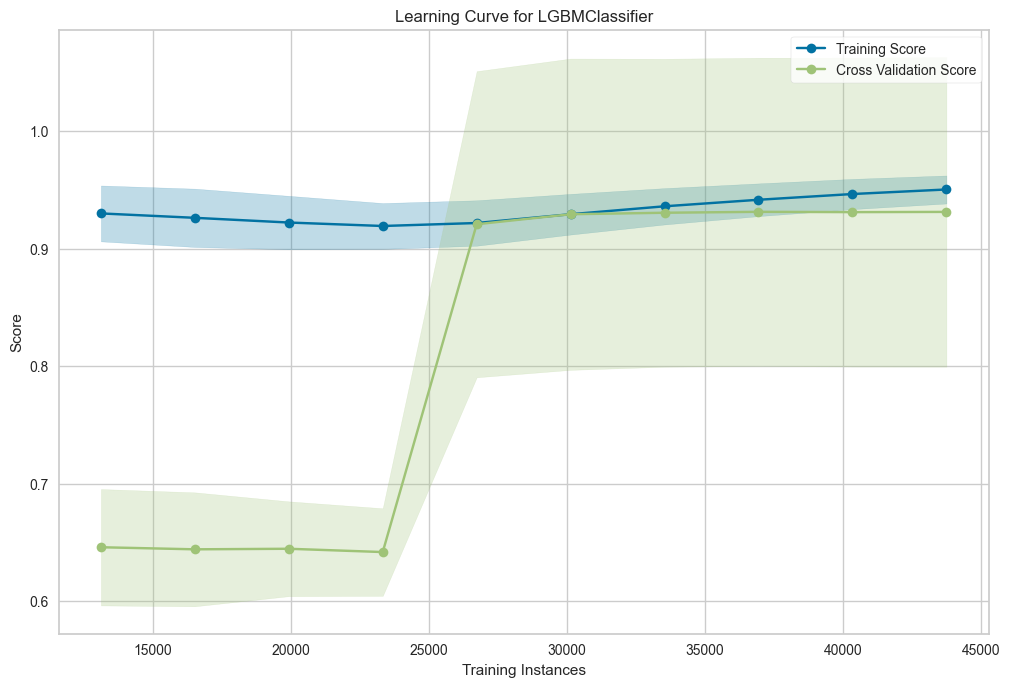

In [133]:
plot_model(tuned_lgbm, plot='learning')

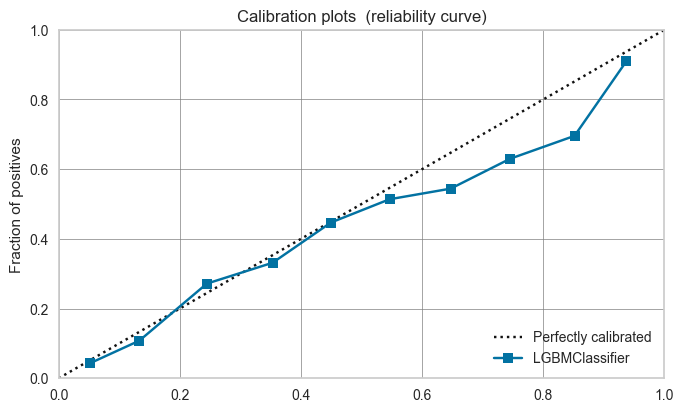

In [134]:
plot_model(tuned_lgbm, plot='calibration')

In [230]:
from sklearn.metrics import precision_recall_curve, accuracy_score, recall_score, precision_score

test_with_preds = tuned_lgbm.predict_proba(clf[2])[:,1]
y_test = clf[4]
precision, recall, thresholds = precision_recall_curve(y_test, test_with_preds)
f=2
f_scores = (1+f**2)*recall*precision/(f**2*(recall+precision))

print('Best threshold: ', thresholds[np.argmax(f1_scores)])
print('Best F1-Score: ', np.max(f1_scores))
print('Best Recall: ', recall[np.argmax(f1_scores)])
print('Best Precision: ', precision[np.argmax(f1_scores)])

accuracy_score(y_test, test_with_preds > thresholds[np.argmax(f1_scores)])

Best threshold:  0.3186263184488322
Best F1-Score:  0.5464190981432361
Best Recall:  0.5340246273493195
Best Precision:  0.5594025797691785


0.900069370915331

In [227]:
clf[3]

age       job   marital  education  default   housing      loan  \
16561  27.0  0.082929  0.135053   0.109864  0.12879  0.116194  0.113402   
11136  36.0  0.122317  0.103335   0.127721  0.12879  0.116194  0.113402   
33701  35.0  0.110027  0.103335   0.113187  0.12879  0.116194  0.113402   
33918  30.0  0.082929  0.135053   0.088548  0.12879  0.116194  0.113402   
29670  46.0  0.092330  0.103335   0.109864  0.12879  0.108796  0.113402   
...     ...       ...       ...        ...      ...       ...       ...   
10656  43.0  0.128811  0.103335   0.088548  0.05153  0.116194  0.113402   
32828  54.0  0.082929  0.103335   0.105970  0.12879  0.108796  0.113402   
21343  44.0  0.092330  0.103335   0.105970  0.05153  0.116194  0.113402   
15775  24.0  0.082929  0.135053   0.088548  0.12879  0.116194  0.109315   
39147  19.0  0.201548  0.135053   0.091426  0.12879  0.116194  0.113402   

        contact     month  day_of_week  ...  month_9_oh  month_10_oh  \
16561  0.147376  0.098258     0.115651  ...         0.0          0.0   
11136  0.052313  0.107958     0.118987  ...         0.0          0.0   
33701  0.052313  0.078471     0.115651  ...         0.0          0.0   
33918  0.147376  0.078471     0.115651  ...         0.0          0.0   
29670  0.147376  0.160378     0.102596  ...         1.0          0.0   
...         ...       ...          ...  ...         ...          ...   
10656  0.052313  0.107958     0.116488  ...         0.0          0.0   
32828  0.147376  0.078471     0.102596  ...         0.0          0.0   
21343  0.147376  0.108532     0.102596  ...         0.0          0.0   
15775  0.147376  0.098258     0.102596  ...         0.0          0.0   
39147  0.147376  0.287122     0.116488  ...         0.0          0.0   

       day_of_week_1_oh  day_of_week_2_oh  day_of_week_3_oh  day_of_week_4_oh  \
16561               0.0               0.0               1.0               0.0   
11136               0.0               0.0               0.0               1.0   
33701               0.0               0.0               1.0               0.0   
33918               0.0               0.0               1.0               0.0   
29670               1.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
10656               0.0               1.0               0.0               0.0   
32828               1.0               0.0               0.0               0.0   
21343               1.0               0.0               0.0               0.0   
15775               1.0               0.0               0.0               0.0   
39147               0.0               1.0               0.0               0.0   

       day_of_week_5_oh  poutcome_1_oh  poutcome_2_oh  poutcome_3_oh  
16561               0.0            1.0            0.0            0.0  
11136               0.0            1.0            0.0            0.0  
33701               0.0            0.0            1.0            0.0  
33918               0.0            0.0            1.0            0.0  
29670               0.0            0.0            1.0            0.0  
...                 ...            ...            ...            ...  
10656               0.0            1.0            0.0            0.0  
32828               0.0            1.0            0.0            0.0  
21343               0.0            1.0            0.0            0.0  
15775               0.0            1.0            0.0            0.0  
39147               0.0            0.0            0.0            1.0  

[11739 rows x 74 columns]

In [233]:
y_train = clf[5]
train_with_preds = tuned_lgbm.predict_proba(clf[3])[:,1]

print(accuracy_score(y_train, train_with_preds > thresholds[np.argmax(f1_scores)]))
print(recall_score(y_train, train_with_preds > thresholds[np.argmax(f1_scores)]))
print(precision_score(y_train, train_with_preds > thresholds[np.argmax(f1_scores)]))

0.8887469120027259
0.5037821482602118
0.506079027355623


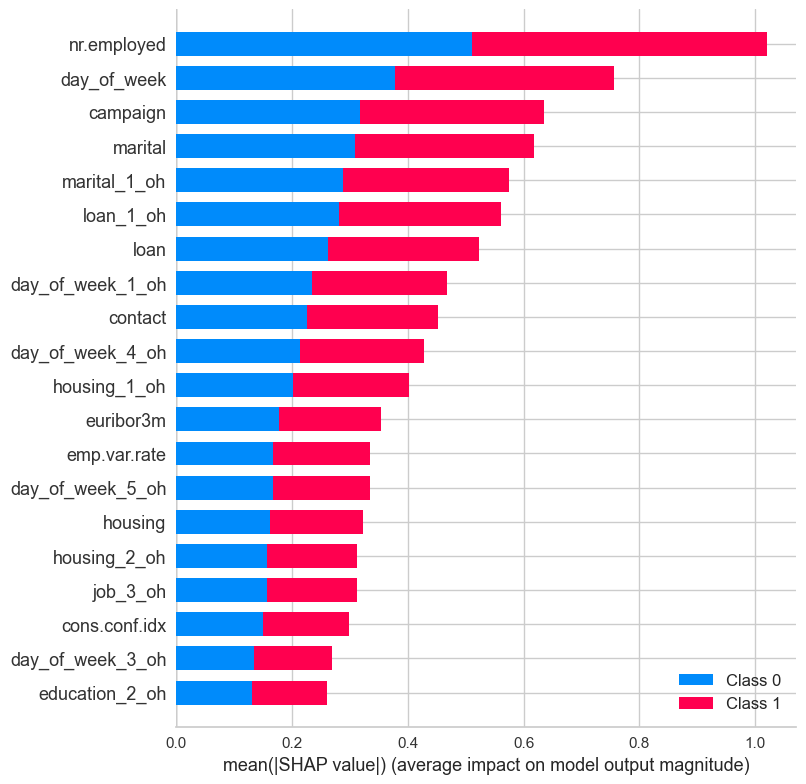

In [195]:
interpret_model(tuned_lgbm)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'st21',
 'st60']

In [281]:
from alibi.explainers import ALE
predict_fn = tuned_lgbm.predict_proba

proba_ale = ALE(tuned_lgbm.predict_proba, feature_names=["age"])
help(ALE)

Help on class ALE in module alibi.explainers.ale:

class ALE(alibi.api.interfaces.Explainer)
 |  ALE(predictor: Callable, feature_names: Union[List[str], NoneType] = None, target_names: Union[List[str], NoneType] = None) -> None
 |  
 |  Base class for explainer algorithms
 |  
 |  Method resolution order:
 |      ALE
 |      alibi.api.interfaces.Explainer
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, predictor: Callable, feature_names: Union[List[str], NoneType] = None, target_names: Union[List[str], NoneType] = None) -> None
 |      Accumulated Local Effects for tabular datasets. Current implementation supports first order
 |      feature effects of numerical features.
 |      
 |      Parameters
 |      ----------
 |      predictor
 |          A callable that takes in an NxF array as input and outputs an NxT array (N - number of
 |          data points, F - number of features, T - number of outputs/targets (e.g. 1 for single output
 |

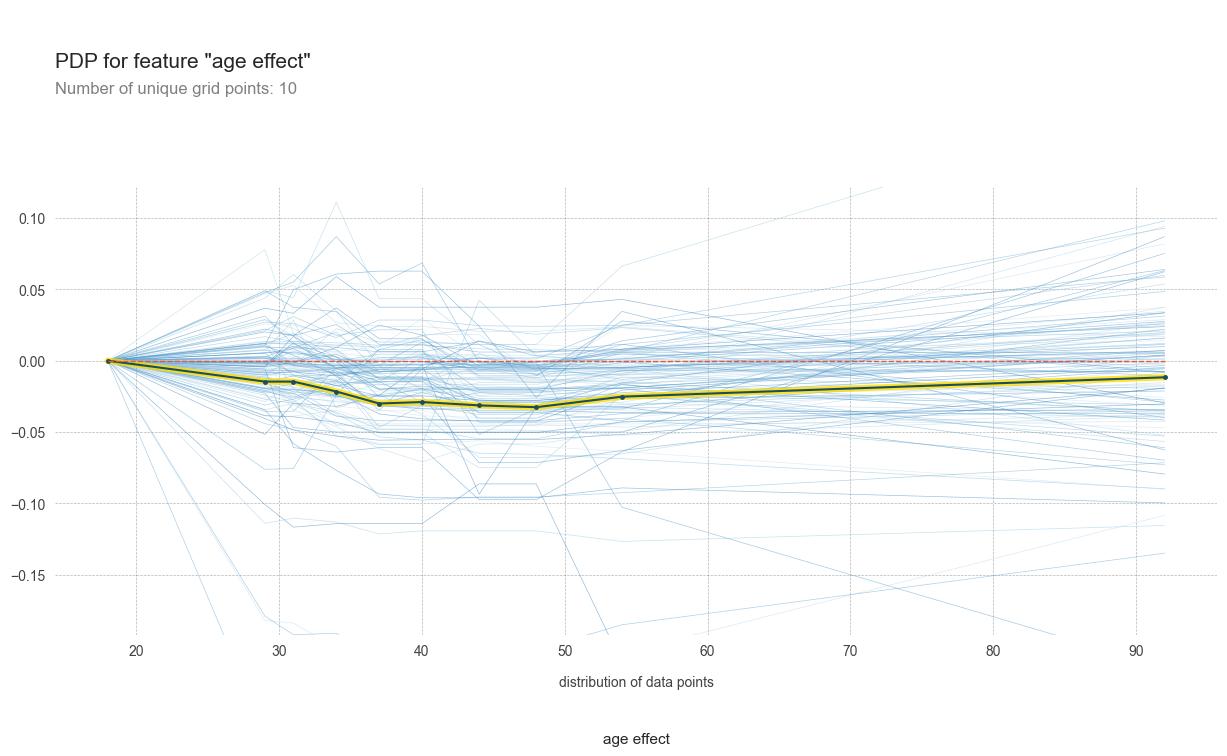

In [294]:
plt.rcParams['figure.figsize'] = [11, 10]

from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tuned_lgbm, dataset=trainset,
                            model_features=trainset.columns, feature='age')

# plot it
fig, axes = pdp.pdp_plot(pdp_goals, 'age effect', plot_lines=True, frac_to_plot=0.01, plot_pts_dist=True)
plt.show()

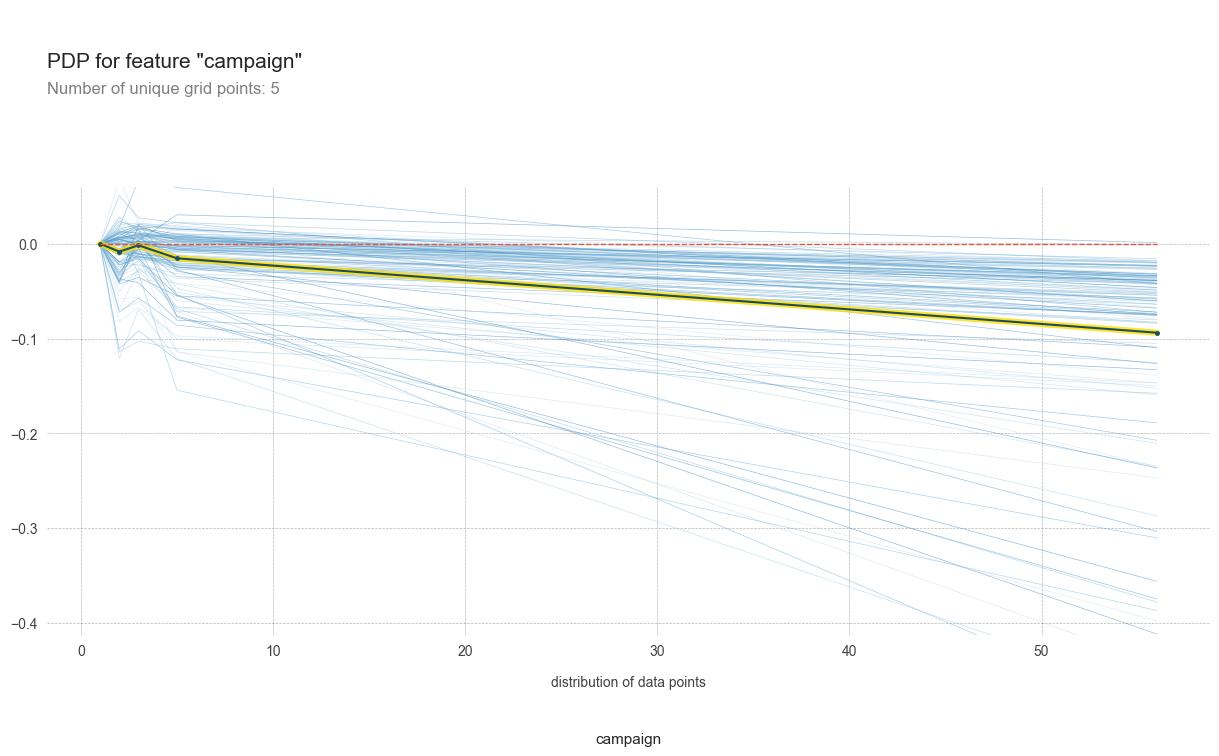

In [295]:
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=tuned_lgbm, dataset=trainset,
                            model_features=trainset.columns, feature='campaign')

# plot it
pdp.pdp_plot(pdp_goals, 'campaign', plot_lines=True, frac_to_plot=0.01, plot_pts_dist=True)
plt.show()